In [149]:
import numpy as np #Scientific computing info
import pandas as pd #Primary data structure library
from __future__ import print_function
#install xlrd
#library for reading data and formatting information from Excel files in the historical

#Importing matplot lib for visuals
import matplotlib as mpl
import matplotlib.pyplot as plt
!pip install xlrd
!pip install openpyxl

import seaborn as sns

In [85]:
from google.colab import files
files.upload()

Saving Canada.csv to Canada (4).csv


{'Canada.csv': b"Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total\r\nImmigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,39,39,47,71,340,496,741,828,1076,1028,1378,1170,713,858,1537,2212,2555,1999,2395,3326,4067,3697,3479,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639\r\nImmigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,0,0,0,0,0,1,2,2,3,3,21,56,96,71,63,113,307,574,1264,1816,1602,1021,853,1450,1223,856,702,560,716,561,539,620,603,15699\r\nImmigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,67,71,69,63,44,69,132,242,434,491,872,795,717,595,1106,2054,1842,2292,2389,2867,3418,3406,3072,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439\r\nImmigrants,Foreigners,American Samoa,909,Oceania,

In [86]:
#Using pandas function read_csv to the read the file

df_can = pd.read_csv("Canada.csv", encoding='latin-1')

In [87]:
#Now that the file is imported and read I began to take a look at the data to figure out next steps
#I used the head() command to get a view of the first five rows of data to get an understanding of how the data is laid out etc.

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Total,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,2635.0,2004.0,58639.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,620.0,603.0,15699.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3774.0,4331.0,69439.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,1.0,1.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#Similar to the head() command, the tail command is the opposite and returns the last 5 rows of data instead of the first 5

df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Total,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
1008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
#When I ran the tail command I noticed that the file had some issues loading into Python
#There should only be 195 rows of data but instead there is 1012 so I need to remove the blank rows
#To do this I first found out the rows that needed to be removed by using index and searching the rows to see where my last actual row of valid data had ended
#Once I found the last row of data that I needed I can proceed with dropping all rows after that
#To drop the rows I use the df.drop command and use index[195:] to remove everything after row 195
#inplace = True is used so I overwrite my current dataset

df_can.drop(df_can.index[195:], inplace=True)

In [90]:
#Re running the tail command to ensure all the extra rows of blank data have been removed which they have

df_can.tail()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2012,2013,Total,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50
190,Immigrants,Foreigners,Viet Nam,935.0,Asia,920.0,South-Eastern Asia,902.0,Developing regions,1191.0,...,1731.0,2112.0,97146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191,Immigrants,Foreigners,Western Sahara,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,0.0,...,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192,Immigrants,Foreigners,Yemen,935.0,Asia,922.0,Western Asia,902.0,Developing regions,1.0,...,174.0,217.0,2985.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
193,Immigrants,Foreigners,Zambia,903.0,Africa,910.0,Eastern Africa,902.0,Developing regions,11.0,...,46.0,59.0,1677.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
194,Immigrants,Foreigners,Zimbabwe,903.0,Africa,910.0,Eastern Africa,902.0,Developing regions,72.0,...,437.0,407.0,8598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
#Similar to the rows issue above, I now have extra blank columns due to the file loading incorrectly so these also need to be removed
# I first found out which columns needed to be removed using the index search and found that everything after column 44 needed to be removed

df_can.columns[44:]

Index(['Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50'],
      dtype='object')

In [92]:
#Same steps as above were taken, I found the last column of valid data and then removed everything after that

df_can.drop(columns=df_can.columns[44:], 
        axis=1, 
        inplace=True)

In [93]:
#Running a head command to check if my changes went through correctly which they have, I am now working a dataset of 5 rows x 44 columns

df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,16.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,80.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0


In [94]:
#Now I can start to do some basic cleaning on the dataset
#After running the head command above I realised there is a lot of columns that either need to be removed or renamed
#Firstly I removed the columns that are not required usinf the df.drop function which were Coverage, AREA, REG, RegName, DEV, DevName
#inplace = True is used so I overwrite my current dataset

df_can.drop(columns=['Coverage', 'AREA', 'REG', 'RegName', 'DEV', 'DevName'], inplace=True)

In [100]:
#Next I started to rename the columns to give them more context and will be easier to work with
#Usingthe df.rename function I renamed OdName to Country and renamed AreaName to Continent
#inplace = True is used so I overwrite my current dataset

df_can.rename(columns = {'OdName':'Country', 'AreaName':'Continent'}, inplace=True)

In [101]:
#Running a head command to check if my changes went through correctly which they have, I now have the correct number of rows and columns and they are named correctly

df_can

,Type,Country,Continent,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Immigrants,Afghanistan,Asia,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
1,Immigrants,Albania,Europe,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
2,Immigrants,Algeria,Africa,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
3,Immigrants,American Samoa,Oceania,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,Immigrants,Andorra,Europe,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Immigrants,Viet Nam,Asia,1191.0,1829.0,2162.0,3404.0,7583.0,5907.0,2741.0,...,1852.0,3153.0,2574.0,1784.0,2171.0,1942.0,1723.0,1731.0,2112.0,97146.0
191,Immigrants,Western Sahara,Africa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
192,Immigrants,Yemen,Asia,1.0,2.0,1.0,6.0,0.0,18.0,7.0,...,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0,2985.0
193,Immigrants,Zambia,Africa,11.0,17.0,11.0,7.0,16.0,9.0,15.0,...,91.0,77.0,71.0,64.0,60.0,102.0,69.0,46.0,59.0,1677.0


In [107]:
#To help with using .loc I updated the index to Country rather than having a number as I don't know what number lines up with each country so this will make it a lot easier to work with
#To do this I sued the df.set_index function and chose Country as my new index
#inplace = True is used so I overwrite my current dataset

df_can.set_index(df_can['Country'], inplace=True)

df_can.head()

,Type,Country,Continent,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Afghanistan,Asia,16.0,39.0,39.0,47.0,71.0,340.0,496.0,...,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0,58639.0
Albania,Immigrants,Albania,Europe,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0,15699.0
Algeria,Immigrants,Algeria,Africa,80.0,67.0,71.0,69.0,63.0,44.0,69.0,...,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0,69439.0
American Samoa,Immigrants,American Samoa,Oceania,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
Andorra,Immigrants,Andorra,Europe,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,15.0


In [108]:
#Now that I have my index updated to Country I can remove the second Country column as its duplicate information
#df.drop was used to drop this column

df_can.drop(['Country'], axis = 1, inplace = True)

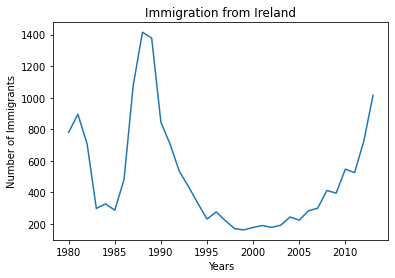

In [111]:
#Assigning the years so I can use it with plots easily, 1980 - 2014
#I created a line chart for Ireland to get an overview of the immigration figures from 180 up until 2013
#matplotlib pylot was used to create this line chart


years = list(map(str, range(1980, 2014)))

df_can.loc['Ireland', years].plot(kind = 'line')
plt.title('Immigration from Ireland')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [118]:
#Next I want to sort the countried by total immigrant so I can find out the most popular countries
#To do this I used df.sort_values, chose my column I wanted to sort by which was Total and then put ascending to false as I want the largest first
#inplace = True is used so I overwrite my current dataset

df_can.sort_values(by='Total', ascending = False, axis = 0, inplace = True)

df_can

,Type,Continent,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Asia,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,10189.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Immigrants,Asia,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,2643.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom of Great Britain and Northern Ireland,Immigrants,Europe,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,21337.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Philippines,Immigrants,Asia,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,7360.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Immigrants,Asia,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,1072.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Immigrants,Europe,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
New Caledonia,Immigrants,Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0
Marshall Islands,Immigrants,Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [119]:
#Creating the top 5 countries df so I can display it visually

df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()

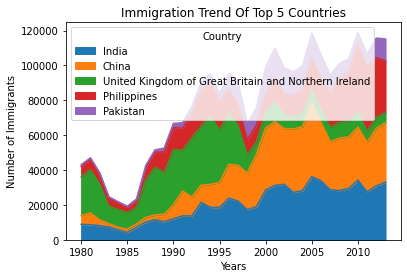

In [120]:
#Years is already assigned so I can go straight into plotting my figures
#I created a area chart for the top 5 countries to get an overview of the immigration figures from 1980 up until 2013
#matplotlib pylot was used to create this area chart

df_top5.plot(kind='area')

plt.title('Immigration Trend Of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

In [125]:
#The figure above can be difficult to interpret as the country label is taking up a lot of extra room due to the large naming convetion
#I decided to rename United Kingdom of Great Britain and Northern Ireland to United Kingdom to help display the visual better which I will test again

df_can.rename({'United Kingdom of Great Britain and Northern Ireland':'United Kingdom'}, inplace=True)

df_top5 = df_can.head()
df_top5 = df_top5[years].transpose()

df_can

,Type,Continent,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Asia,8880.0,8670.0,8147.0,7338.0,5704.0,4211.0,7150.0,10189.0,...,36210.0,33848.0,28742.0,28261.0,29456.0,34235.0,27509.0,30933.0,33087.0,691904.0
China,Immigrants,Asia,5123.0,6682.0,3308.0,1863.0,1527.0,1816.0,1960.0,2643.0,...,42584.0,33518.0,27642.0,30037.0,29622.0,30391.0,28502.0,33024.0,34129.0,659962.0
United Kingdom,Immigrants,Europe,22045.0,24796.0,20620.0,10015.0,10170.0,9564.0,9470.0,21337.0,...,7258.0,7140.0,8216.0,8979.0,8876.0,8724.0,6204.0,6195.0,5827.0,551500.0
Philippines,Immigrants,Asia,6051.0,5921.0,5249.0,4562.0,3801.0,3150.0,4166.0,7360.0,...,18139.0,18400.0,19837.0,24887.0,28573.0,38617.0,36765.0,34315.0,29544.0,511391.0
Pakistan,Immigrants,Asia,978.0,972.0,1201.0,900.0,668.0,514.0,691.0,1072.0,...,14314.0,13127.0,10124.0,8994.0,7217.0,6811.0,7468.0,11227.0,12603.0,241600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Immigrants,Europe,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0
New Caledonia,Immigrants,Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0
Marshall Islands,Immigrants,Oceania,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


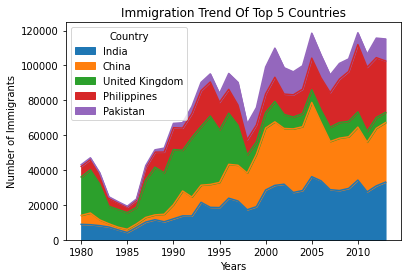

In [126]:
#My rename function helped with the visual as its a lot easier to read the data now with no obstructions

df_top5.plot(kind='area')

plt.title('Immigration Trend Of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

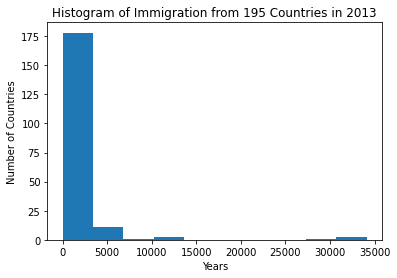

In [127]:
#Histogram chart

df_can['2013'].plot(kind='hist')

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Years')

plt.show()

In this histogram the bins do not align with the with the tick marks on the horizontal axis so I will try to fix that to make it more effective.

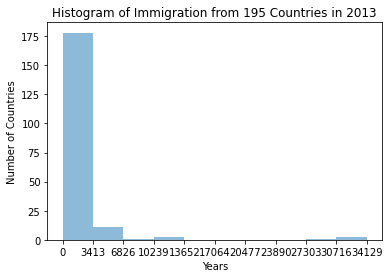

In [146]:
#making updates to the histogram to make it more effective visually

count, bin_edges = np.histogram(df_can['2013'])

df_can['2013'].plot(kind='hist', xticks = bin_edges, linewidth=1, alpha=0.5)

plt.title('Histogram of Immigration from 195 Countries in 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Years')

plt.show()

In [147]:
#defining the ireland dataframe so it can be displayed in a bar chart

df_ireland = df_can.loc['Ireland', years]

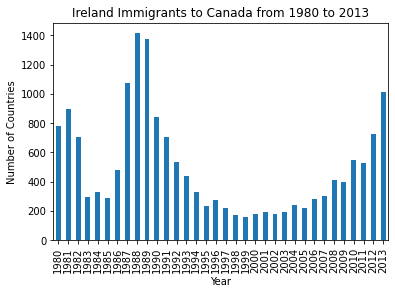

In [148]:
#displaying the ireland dataframe that I previously created in a bar chart which breaks down the total number of immigrants split out by each year

df_ireland.plot(kind='bar')

plt.title('Ireland Immigrants to Canada from 1980 to 2013')
plt.ylabel('Number of Countries')
plt.xlabel('Year')

plt.show()